In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
arr=imread('images/checkerboard.png')

In [6]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [7]:
arr=rgb2gray(arr)

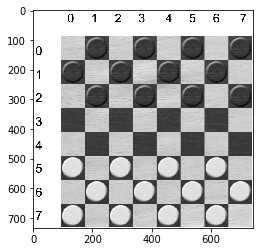

In [11]:
imshow(arr,cmap=cm.gray)

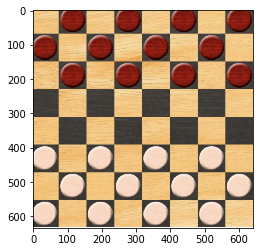

In [15]:
arr=arr[100:,100:,:3]
imshow(arr)

In [16]:
arr.shape

(634, 642, 3)

In [19]:
def get_square(arr,Nr,Nc,r,c):
    
    ar,ac=arr.shape[0],arr.shape[1]
    col_pixels_per_board_square=(ac/Nc)
    row_pixels_per_board_square=(ar/Nr)
    
    sc=int(col_pixels_per_board_square*c)
    ec=int(col_pixels_per_board_square*(c+1))
    
    sr=int(row_pixels_per_board_square*r)
    er=int(row_pixels_per_board_square*(r+1))
    
    return arr[sr:er,sc:ec,:]
    

In [22]:
square=get_square(arr,8,8,3,3)

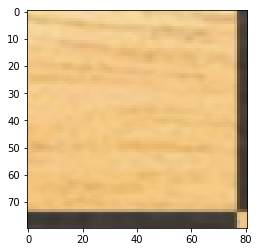

In [25]:
imshow(square)

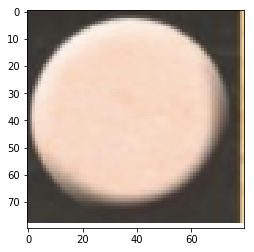

In [26]:
imshow(get_square(arr,8,8,7,6))

In [27]:
# use Photoshop or Gimp to make these small images
pieces_filenames=[
        'images/piece1.png',
       'images/piece2.png',
       'images/board1.png',
       'images/board2.png']

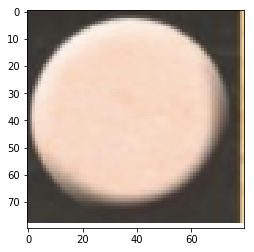

In [28]:
square=get_square(arr,8,8,7,6)
imshow(square)

In [29]:
pieces=[imread(filename)[:,:,:3] for filename in pieces_filenames]
names=[os.path.splitext(os.path.split(filename)[-1])[0] for filename in pieces_filenames]
names

['piece1', 'piece2', 'board1', 'board2']

In [30]:
piece=pieces[0]
piece.shape

(18, 20, 3)

In [31]:
rgb=[piece.mean(axis=(0,1)) for piece in pieces]

In [32]:
rgb

[array([0.5247939 , 0.10913925, 0.06543584], dtype=float32),
 array([0.97213745, 0.8440282 , 0.7641132 ], dtype=float32),
 array([0.9505218, 0.7754182, 0.5079452], dtype=float32),
 array([0.24291907, 0.23115392, 0.21546794], dtype=float32)]

In [43]:
def match_colors(image,rgb):
    values=zeros((image.shape[0],image.shape[1],len(rgb)))
    color_count=0
    for r,g,b in rgb:
        values[:,:,color_count]=(image[:,:,0]-r)**2 + (image[:,:,1]-g)**2 + (image[:,:,2]-b)**2
        color_count+=1
        
    return values.argmin(axis=2),values

In [44]:
match,distances=match_colors(arr,rgb)

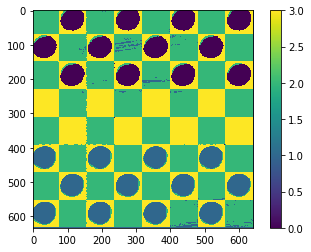

In [46]:
imshow(match)
colorbar()

In [47]:
names

['piece1', 'piece2', 'board1', 'board2']

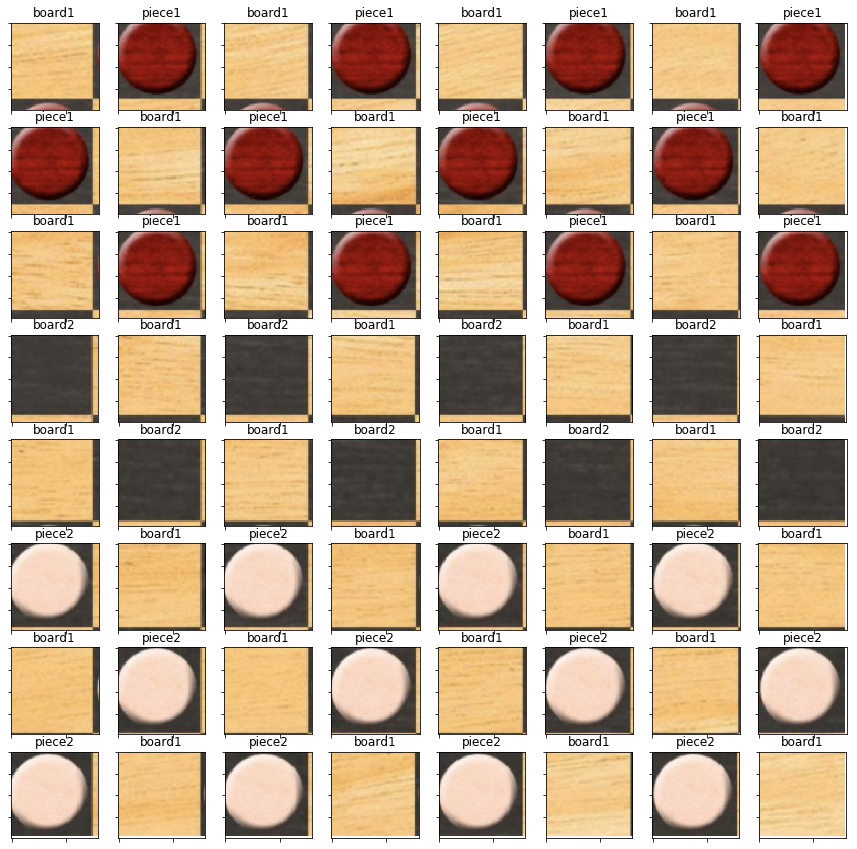

In [48]:
count=1
figure(figsize=(15,15))
threshold=0.5
for r in range(8):
    for c in range(8):
        subplot(8,8,count)
        square=get_square(arr,8,8,r,c)
        match,distances=match_colors(square,rgb)
        found=False
        for i,name in enumerate(names):
            if sum(match==i)/prod(match.shape)>threshold:
                which_piece=i
                found=True
                break
            
        
        imshow(square)
        if found:
            title(names[which_piece])
        else:
            title('Error')
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        count+=1


In [49]:
from Game import Board

Version:  0.2.7


In [50]:
state=Board(8,8)

In [51]:
count=1
threshold=0.5
for r in range(8):
    for c in range(8):
        square=get_square(arr,8,8,r,c)
        match,distances=match_colors(square,rgb)
        found=False
        for i,name in enumerate(names):
            if sum(match==i)/prod(match.shape)>threshold:
                which_piece=i
                found=True
                break
                
        if which_piece==2 or which_piece==3:  # background
            state[r,c]=0
        elif which_piece==0:
            state[r,c]=1
        else:
            state[r,c]=2
    
state

 0  1  0  1  0  1  0  1 
 1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1 
 0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0 
 2  0  2  0  2  0  2  0 
 0  2  0  2  0  2  0  2 
 2  0  2  0  2  0  2  0 

## try with a worse image

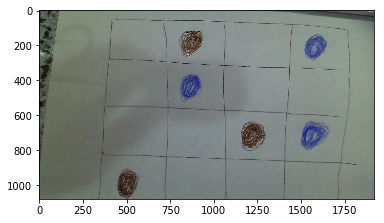

In [52]:
arr=imread('images/test.jpg')
imshow(arr)

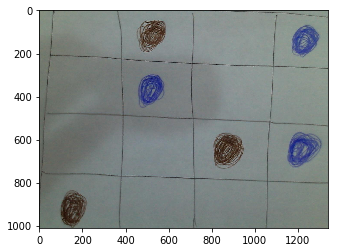

In [53]:
arr=imread('images/test.jpg')
arr=arr[70:,350:1690]
imshow(arr)

In [54]:
# use Photoshop or Gimp to make these small images
pieces_filenames=[
        'images/testpiece1.png',
       'images/testpiece2.png',
       'images/testboard1.png',
       'images/testboard2.png']

pieces=[imread(filename)[:,:,:3] for filename in pieces_filenames]
names=[os.path.splitext(os.path.split(filename)[-1])[0] for filename in pieces_filenames]
names

['testpiece1', 'testpiece2', 'testboard1', 'testboard2']

In [114]:
rgb=[piece.mean(axis=(0,1)) for piece in pieces]
rgb

[array([0.34716365, 0.279665  , 0.22882614], dtype=float32),
 array([0.20432833, 0.24512929, 0.49970627], dtype=float32),
 array([0.5573915 , 0.59158546, 0.5846584 ], dtype=float32),
 array([0.44671208, 0.4668955 , 0.44156414], dtype=float32)]

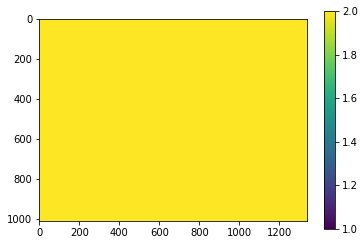

In [117]:
match,distances=match_colors(arr,rgb)
imshow(match)
colorbar()

In [118]:
distances.shape

(1010, 1340, 4)

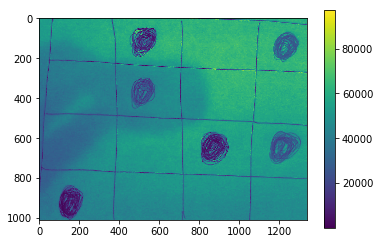

In [121]:
imshow(distances[:,:,0])
colorbar()

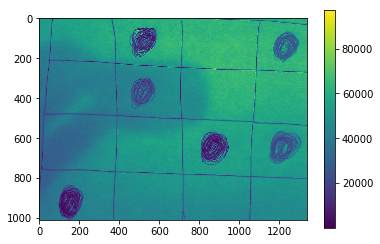

In [122]:
imshow(distances[:,:,1])
colorbar()

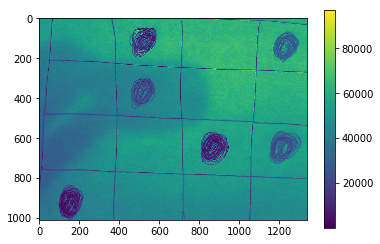

In [123]:
imshow(distances[:,:,2])
colorbar()

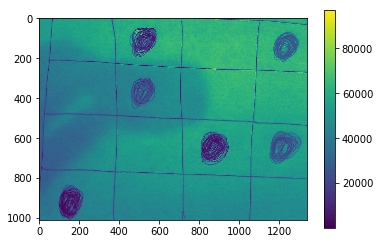

In [125]:
imshow(distances[:,:,3])
colorbar()